# **Statistical Analysis of Gender Differences in Average Purchase Amounts**

## **Import packages and load data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## **Visualizing Gender Differences in Average Purchase Amounts**

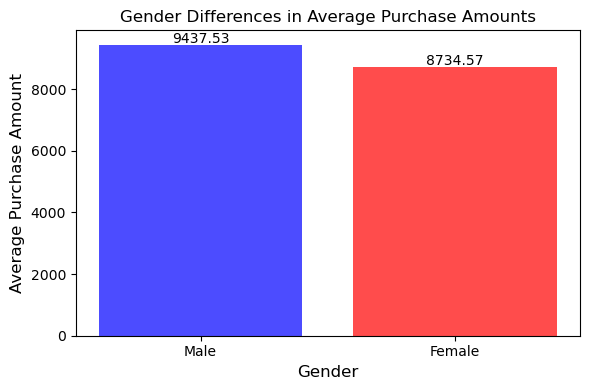

In [2]:
male_purchases = df[df["Gender"] == "M"]["Purchase"]
female_purchases = df[df["Gender"] == "F"]["Purchase"]

mean_male = male_purchases.mean()
mean_female = female_purchases.mean()

# Define categories and means
categories = ['Male', 'Female']
means = [mean_male, mean_female]

# Create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(categories, means, color=['blue', 'red'], alpha=0.7)
plt.title('Gender Differences in Average Purchase Amounts', fontsize=12)
plt.ylabel('Average Purchase Amount', fontsize=12)
plt.xlabel('Gender', fontsize=12)

# Add numeric labels on bars
for i, mean in enumerate(means):
    plt.text(i, mean + 45, f'{mean:.2f}', ha='center', fontsize=10)  
# Show the plot
plt.tight_layout()
plt.show()

## **Statistical Analysis of Gender Differences in Average Purchase Amounts**

In [3]:
from scipy.stats import norm

# Ensure there are no missing values in the Purchase column
male_purchases = df[df["Gender"] == "M"]["Purchase"].dropna()
female_purchases = df[df["Gender"] == "F"]["Purchase"].dropna()

# Calculate statistics
mean_male = male_purchases.mean()
mean_female = female_purchases.mean()
std_male = male_purchases.std()  # Sample standard deviation
std_female = female_purchases.std()
n_male = male_purchases.count()
n_female = female_purchases.count()

# Check if sample sizes are large enough for a Z-test
if n_male > 30 and n_female > 30:
    # Z-test statistic
    z = (mean_male - mean_female) / np.sqrt((std_male**2 / n_male) + (std_female**2 / n_female))

    # One-tailed p-value (assuming we hypothesize that mean_male > mean_female)
    p_value = 1 - norm.cdf(z)

    # Print results with more decimal places
    print(f"Z-statistic: {z:.6f}")
    print(f"P-value: {p_value:.10f}")

    # Interpretation
    if p_value < 0.05:
        print("Reject the null hypothesis: There is a significant difference in average purchase between genders.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in average purchase between genders.")
else:
    print("Sample sizes are too small for a Z-test. Consider using a t-test instead.")

Z-statistic: 46.358249
P-value: 0.0000000000
Reject the null hypothesis: There is a significant difference in average purchase between genders.
